# Classification: Heart Failure Data

For this part of the project, you will create a classification model. In the first part, you will train a decision tree model, and in the second part (optional and advanced), you will train a support vector machine model.

The dataset contains the medical records of 260 patients who experienced heart failure, collected during their follow-up period. Each patient profile includes 11 clinical features. For more information on these features, you can refer to the metadata [here](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records).

## Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import random

## Load data

In [16]:
link_to_file = "https://raw.githubusercontent.com/Center-for-Health-Data-Science/Python_part2/main/data/project_work/heart_failure.csv"

df = pd.read_csv(link_to_file)
df.head()

,id,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_sodium,smoking,cpk_mcg,platelets,serum_creatinine,death
0,10224,60.0,0.0,0.0,40.0,0,134,0.0,75.0,217000.0,1.3,1
1,10908,40.0,1.0,0.0,35.0,0,137,0.0,46.0,255000.0,0.9,0
2,11855,58.0,0.0,1.0,25.0,0,138,0.0,44.0,189866.0,1.0,0
3,12428,65.0,1.0,1.0,30.0,1,136,0.0,46.0,297000.0,1.6,1
4,12584,50.0,1.0,1.0,40.0,0,130,0.0,43.0,260000.0,0.7,0


## EDA and data cleaning

The first step with our data is Exploratory Data Analysis (EDA). Use these questions to guide your analysis:

* Which features/explanatory variables are present? Are they numeric or categorical? Should they all be interpreted the same way? What do you want to use as the outcome variable?
* Are there missing values?
* Create bar plots for the categorical variables and check if the categories are balanced.
* Create box plots for the numeric variables.

### Features present

The dataframe consists of 260 rows and 12 columns.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   260 non-null    int64  
 1   age                  260 non-null    float64
 2   anaemia              256 non-null    float64
 3   diabetes             257 non-null    float64
 4   ejection_fraction    260 non-null    float64
 5   high_blood_pressure  260 non-null    int64  
 6   serum_sodium         260 non-null    int64  
 7   smoking              256 non-null    float64
 8   cpk_mcg              260 non-null    float64
 9   platelets            255 non-null    float64
 10  serum_creatinine     258 non-null    float64
 11  death                260 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.5 KB


We have a look at the number of unique elements in each column to determine which of them are numeric and which are categorical.

In [18]:
df.nunique()

,0
id,260
age,48
anaemia,2
diabetes,2
ejection_fraction,17
high_blood_pressure,2
serum_sodium,22
smoking,2
cpk_mcg,119
platelets,159


Examining the number of unique values in each column reveals that some features contain only two distinct values. This indicates that these features (anaemia, diabetes, high_blood_pressure, smoking, death) should be interpreted as categorical where 0 = no and 1 = yes. We remove the id column.

In [19]:
numeric_features = ['age', 'ejection_fraction', 'serum_sodium', 'cpk_mcg', 'platelets', 'serum_creatinine']
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'death']

Change the categorical features to categorical class.

In [20]:
for cat_column in categorical_features:
  df[cat_column] = df[cat_column].astype('category')

In [21]:
df = df.drop(columns = 'id')

### Missing data

There are missing values in some of the features.

In [22]:
df.isnull().sum(axis = 0)

,0
age,0
anaemia,4
diabetes,3
ejection_fraction,0
high_blood_pressure,0
serum_sodium,0
smoking,4
cpk_mcg,0
platelets,5
serum_creatinine,2


We omit missing values:

In [23]:
df = df.dropna()

### Balance of categorical features

Bar plots of the categorical variables show that there is quite a large skew, so we have more data for one group than the other. Still the amount of data points in the less common group are probably sufficient.

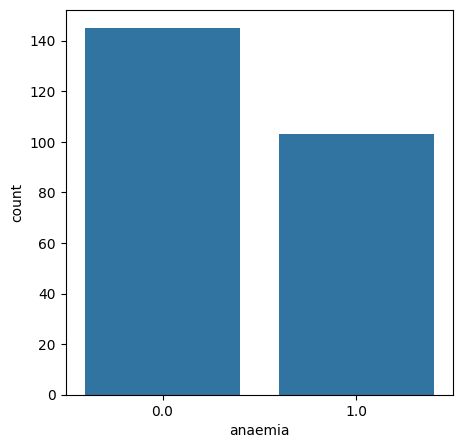

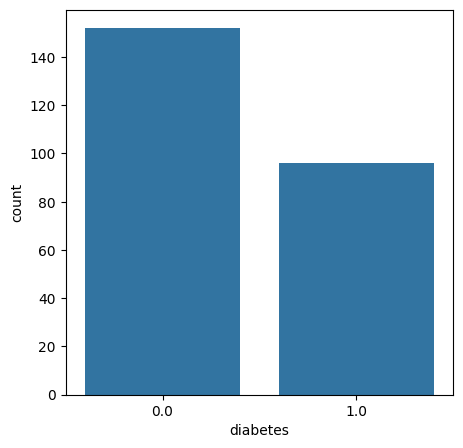

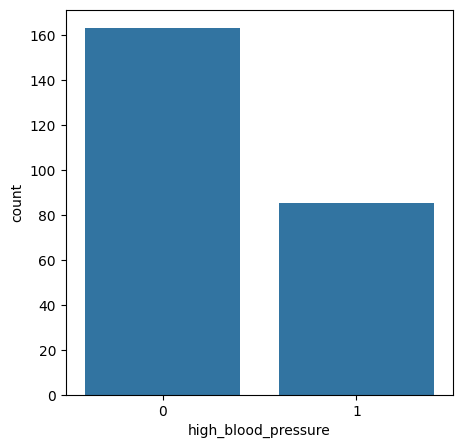

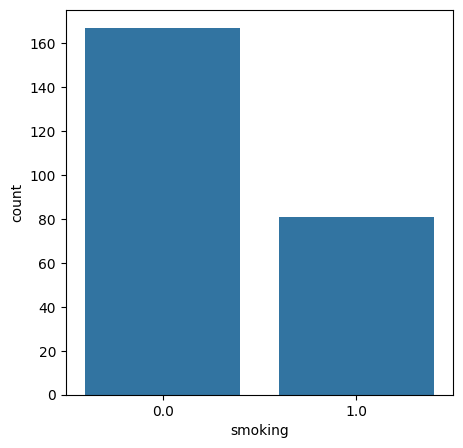

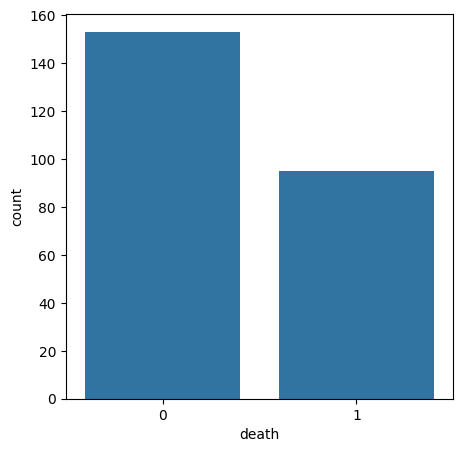

In [24]:
for col in categorical_features:
    plt.figure(figsize=(5,5))
    sns.countplot(df, x = col)

### Summary stats for numeric features

In [25]:
df.loc[:,numeric_features].describe()

,age,ejection_fraction,serum_sodium,cpk_mcg,platelets,serum_creatinine
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,63.212367,37.290323,136.645161,141.802419,249262.647702,1.153548
std,31.910506,11.479095,3.902026,360.663442,77154.603664,0.330398
min,40.000000,14.000000,126.000000,8.000000,25100.000000,0.500000
25%,51.000000,30.000000,134.000000,32.000000,207000.000000,0.900000
50%,60.000000,36.500000,137.000000,55.000000,254000.000000,1.100000
75%,70.000000,45.000000,139.250000,89.000000,294750.000000,1.300000
max,526.000000,65.000000,148.000000,2281.000000,481000.000000,2.000000


### Distributions and outliers

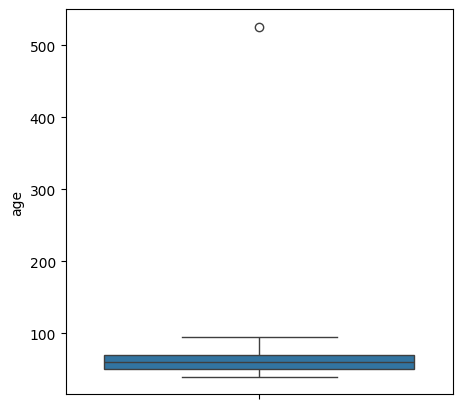

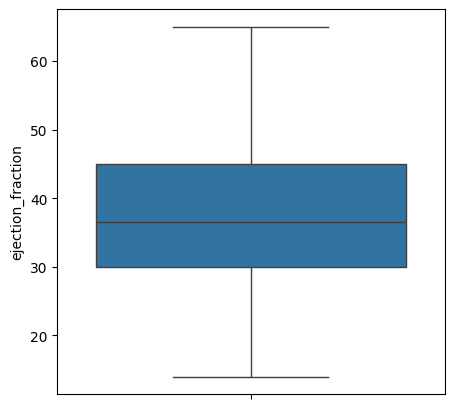

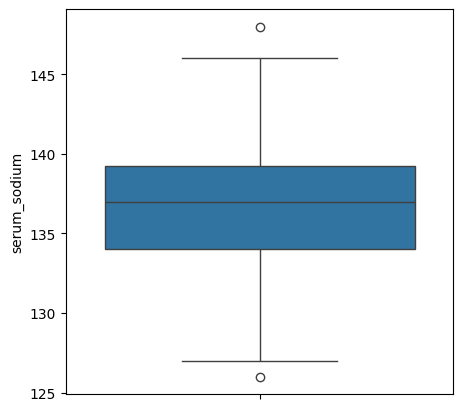

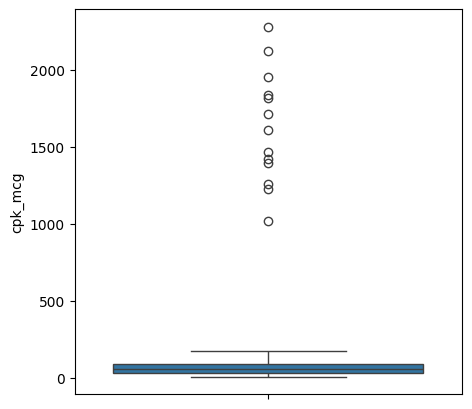

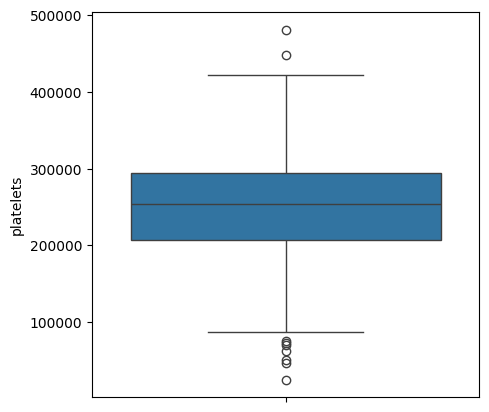

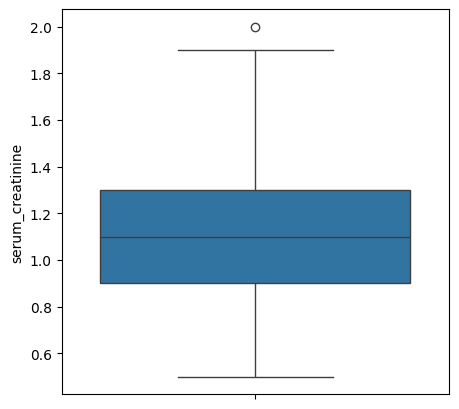

In [26]:
for col in numeric_features:
    plt.figure(figsize=(5,5))
    sns.boxplot(df, y = col)

The cpk_mcg feature appears to have outliers quite far from the rest ofthe distribution. We remove the 14 observations with cpk_mcg values above 500 and check the distribition again.

<Axes: ylabel='cpk_mcg'>

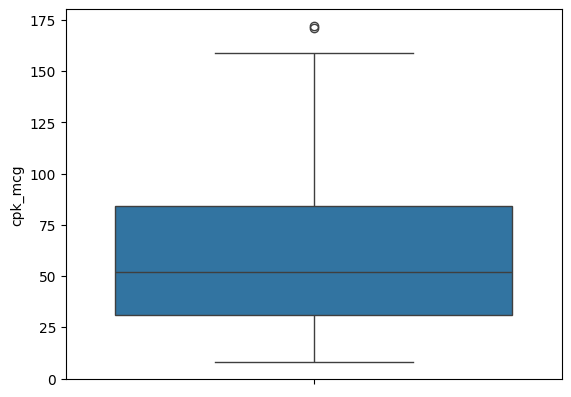

In [27]:
df = df.loc[df['cpk_mcg'] < 500]
sns.boxplot(df, y = 'cpk_mcg')

### Correlations

Taking a look at the correlation between the numeric features and the outcome variable. Highest correction is between serum_creatinine and death.

<Axes: >

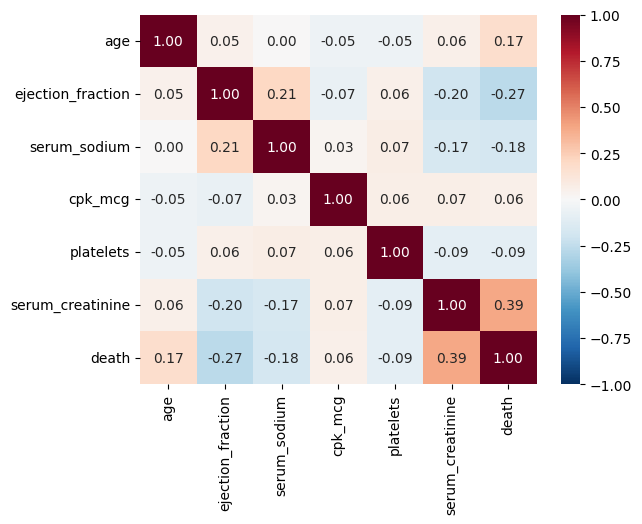

In [28]:
df_corr = pd.DataFrame(df.loc[:, numeric_features + ['death']]).corr()

sns.heatmap(df_corr,
            cmap = "RdBu_r",
            center = 0, vmin = -1, vmax = 1,
            annot=True, fmt=".2f")

## Prepare data for modelling


### Scale numeric values

Our numeric features are on very different scales (see summary stats) and we will use scaling to make them more comparable.

In [ ]:
num_pred = df.loc[:,numeric_features].to_numpy()

from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
num_pred_scale = scaling.fit_transform(num_pred)

### Categorical features

Categorical features were changed to that data type during EDA. They are all binary so we do not need dummy coding.

### Outcome variable

Transforming the outcome (death) column to numpy to create y.

In [ ]:
y = df['death'].astype('category').to_numpy()
y.shape

(246,)

### Assembling feature array X

Make X: Merge the scaled numeric features with the categorical variables (excluding the outcome variable) into an array.

In [ ]:
#making a copy of the list of features and removing 'death' from the copy
#ther are other ways to obtain this list, we only show one
categorical_features_no_outcome = categorical_features.copy()
categorical_features_no_outcome.remove('death')

X = np.concatenate((num_pred_scale, df.loc[:,categorical_features_no_outcome].to_numpy()), axis = 1)
X.shape

(246, 10)

### Split into test and training set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

### PCA

We will also make a PCA of the numeric values.

The PCA model is defined and fitted to the data. 4 PC are defined.

In [ ]:
from sklearn.decomposition import PCA

PCA_obj = PCA(n_components = 4)
transformed = PCA_obj.fit_transform(num_pred_scale)
pca_df = pd.DataFrame(transformed, columns= ['PC1', 'PC2', 'PC3', 'PC4'])

PC is rescaled.

In [ ]:
scalePC1 = 2.0/(pca_df['PC1'].max() - pca_df['PC1'].min())
scalePC2 = 2.0/(pca_df['PC2'].max() - pca_df['PC2'].min())
pca_df['PC1_scaled'] = pca_df['PC1'] * scalePC1
pca_df['PC2_scaled'] = pca_df['PC2'] * scalePC2

pca_df['outcome'] = df['death']
pca_df.head()

,PC1,PC2,PC3,PC4,PC1_scaled,PC2_scaled,outcome
0,0.617484,-0.045891,0.067602,-0.323360,0.193803,-0.016138,1.0
1,-0.972080,-1.188482,-1.083614,-0.064144,-0.305097,-0.417940,0.0
2,0.161616,-0.401493,-0.889011,-0.556813,0.050725,-0.141189,0.0
3,1.077032,0.068000,0.352224,0.890036,0.338037,0.023913,1.0
4,-0.407059,-0.712989,-1.521074,0.656794,-0.127759,-0.250729,0.0


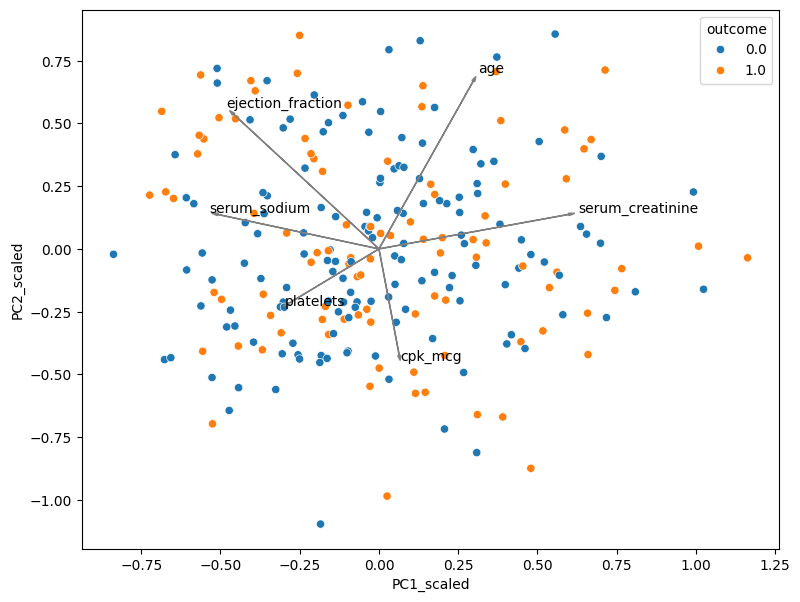

In [ ]:
plt.figure(figsize=(9,7))

#the data projected into PC1 and PC2, colored by outcome
sns.scatterplot(pca_df, x = 'PC1_scaled', y = 'PC2_scaled', hue = 'outcome')

#the eigenvectors
for i, feature in enumerate(numeric_features):
    plt.arrow(0, 0,
              PCA_obj.components_[0, i],
              PCA_obj.components_[1, i],
              head_width=0.01,
              head_length=0.02,
              color="gray")
    plt.text(PCA_obj.components_[0, i] * 1.05,
            PCA_obj.components_[1, i] * 1.05,
            feature, fontsize=10)

There is some spread in the data but we do not have good separation of the outcome (death/no death).

## Training the model




A decision tree model is defined and trained.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_leaf_nodes=6)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=6)

In [ ]:
#these are the features in order
np.concatenate((numeric_features, categorical_features_no_outcome))

array(['age', 'ejection_fraction', 'serum_sodium', 'cpk_mcg', 'platelets',
       'serum_creatinine', 'anaemia', 'diabetes', 'high_blood_pressure',
       'smoking'], dtype='<U19')

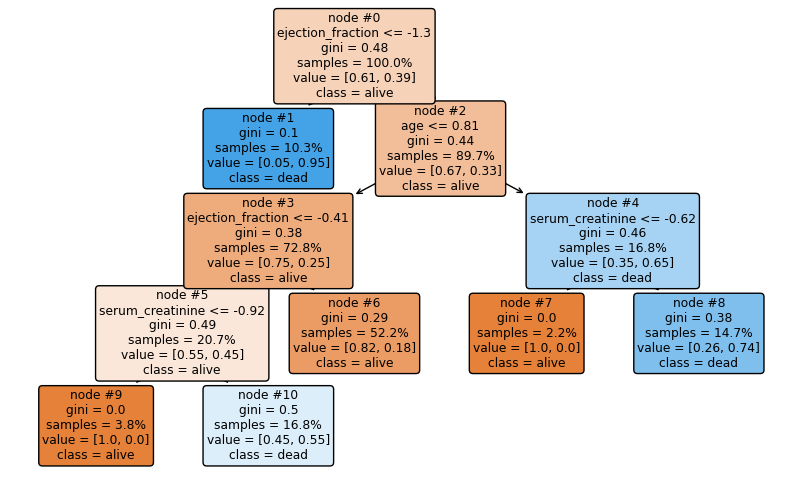

In [ ]:
from sklearn.tree import plot_tree

#define the canvas size so we get a bigger plot
plt.figure(figsize=(10,6))

plot_tree(tree_model,
          #the names of the input features, in the order of the columns in X_train
          #feature_names = df.drop(columns = ['id', 'death']).columns,
          feature_names = np.concatenate((numeric_features, categorical_features_no_outcome)),
          #show percentage of samples instead of numbers
          proportion=True,
          #color nodes by purity
          filled=True,
          #the names of the classes
          class_names=['alive','dead'],
          #how many digits after the dot to show
          precision=2,
          #cute rounded nodes
          rounded=True,
          node_ids=True)
plt.show()

## Model evaluation

In order to evaluate model performance, we need to apply our trained decision tree model to our test data and see what labels it predicts and how they compare to the known true class (alive or dead).


In [ ]:
y_pred = tree_model.predict(X_test)

In [ ]:
print('predicted:')
print(y_pred[:10])
print(y_pred.shape, end = '\n\n')

print('true outcome:')
print(y_test[:10])
print(y_test.shape)

predicted:
[0 1 0 1 0 1 0 0 1 0]
(62,)

true outcome:
[0 0 1 1 0 1 0 0 0 0]
(62,)


Since we're getting labels from the decision tree, we will look at a confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_true = y_test,y_pred = y_pred),
                              index=['Actual_0', 'Actual_1'],
                              columns=['Pred_0','Pred_1'])

,Pred_0,Pred_1
Actual_0,30,8
Actual_1,10,14


Now, we calculate the precision which is the proportion of the identified 'cases', i.e. 'positives' are actually cases. Here it means, out of everyone we predict to be dead, how many people truly are?

In [ ]:
from sklearn.metrics import precision_score
round(precision_score(y_true = y_test,y_pred = y_pred, pos_label = 1), 2)

0.64

Finially we calcualte the recall which is the proportion of the true 'cases', i.e. positive we have found.

In [ ]:
from sklearn.metrics import recall_score
round(recall_score(y_true = y_test,y_pred = y_pred, pos_label = 1),2)

0.58

## Model interpretation

Let's look at the feature importances of the model.
This model finds that age, ejection_fraction and serum_creatintine are the features that are the most important features for prediction if a individual is dead or alive. The categorical variables appear to be irrelevant to the model.

In [ ]:
# Check which features are in with place
pd.DataFrame(tree_model.feature_importances_, np.concatenate((numeric_features, categorical_features_no_outcome)))

,0
age,0.240686
ejection_fraction,0.532883
serum_sodium,0.000000
cpk_mcg,0.000000
platelets,0.000000
serum_creatinine,0.226431
anaemia,0.000000
diabetes,0.000000
high_blood_pressure,0.000000
smoking,0.000000


## Optional and advanced part: Support Vector Machine

If you feel comfortable with the previous section and want an extra challenge, this section is for you!

We are going to fit a model that you haven't encountered yet: the Support Vector Machine (SVM). Use Google (or your preferred search engine) to find out which module from scikit-learn you need to import to use this model.



In [ ]:
# Import the model
from sklearn import svm

# Initialize the model with default settings
clf = svm.SVC()

# Fit the model with your traning data
clf.fit(X_train, y_train)

SVC()

Use the model to predict the outcome of X_test.

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('predicted:')
print(y_pred[:10])
print(y_pred.shape, end = '\n\n')

print('true outcome:')
print(y_test[:10])
print(y_test.shape)

predicted:
[0 1 0 0 0 0 0 0 0 0]
(65,)

true outcome:
[1 1 0 1 0 0 1 0 0 0]
(65,)


Make the confusion matrix.

In [ ]:
pd.DataFrame(confusion_matrix(y_true = y_test,y_pred = y_pred),
                              index=['Actual_0', 'Actual_1'],
                              columns=['Pred_0','Pred_1'])

,Pred_0,Pred_1
Actual_0,38,6
Actual_1,10,11


Calculate the precision and recall. Discuss how the model performs with the person next to you.

In [ ]:
# Precision
precision = round(precision_score(y_true = y_test,y_pred = y_pred, pos_label = 1), 2)
print('Precision: ', str(precision))

# Recall
recall = round(recall_score(y_true = y_test,y_pred = y_pred, pos_label = 1),2)
print('Recall: ', str(recall))

Precision:  0.65
Recall:  0.52


Let's try to improve the model tweaking the kernel parameter. First, look at what the kernel was set to in the default run we just ran.

In [ ]:
# Check parameters of your model.
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Now, we take a look at the possible arguments for the kernel parameter. For this we use the help function.

In [ ]:
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

Choose one of the arguments (other than the default) and run the model again. Evaluate how this model performs compared to the default settings.

In [ ]:
kernel = 'linear'
print(f"Kernel: {kernel}")

# Initialize the model with default settings
clf = svm.SVC(kernel = kernel)

# Fit the model with your traning data
clf.fit(X_train, y_train)

# Predict the outcome of X_test
y_pred = clf.predict(X_test)

pd.DataFrame(confusion_matrix(y_true = y_test,y_pred = y_pred),
                              index=['Actual_0', 'Actual_1'],
                              columns=['Pred_0','Pred_1'])

# Precision
precision = round(precision_score(y_true = y_test,y_pred = y_pred, pos_label = 1), 2)
print(f'Precision: {precision}')

# Recall
recall = round(recall_score(y_true = y_test,y_pred = y_pred, pos_label = 1),2)
print(f'Recall: {recall}', end='\n\n')

Kernel: linear
Precision: 0.53
Recall: 0.38



You will need to run the model with all arguments to test which kernel performs the best. Do not include the 'precomputed' argument. You can do it one by one (boring) or try to do it in a loop or create a function.


In [ ]:
# List of kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Loop over different kernels
for kernel in kernels:

    # Print out the results for each kernel
    print(f"Kernel: {kernel}")

    # Initialize the SVM model with the current kernel
    clf = svm.SVC(kernel = kernel)

    # Fit the model with training data
    clf.fit(X_train, y_train)

    # Predict the outcome of X_test
    y_pred = clf.predict(X_test)

    # Calculate confusion matrix
    cm = pd.DataFrame(confusion_matrix(y_true = y_test,y_pred = y_pred),
                                       index=['Actual_0', 'Actual_1'],
                                       columns=['Pred_0','Pred_1'])

    # Precision
    precision = round(precision_score(y_true=y_test, y_pred=y_pred, pos_label=1), 2)
    print(f'Precision: {precision}')

    # Recall
    recall = round(recall_score(y_true=y_test, y_pred=y_pred, pos_label=1), 2)
    print(f'Recall: {recall}', end='\n\n')



Kernel: linear
Precision: 0.67
Recall: 0.33

Kernel: poly
Precision: 0.75
Recall: 0.25

Kernel: rbf
Precision: 0.67
Recall: 0.42

Kernel: sigmoid
Precision: 0.62
Recall: 0.42

